In [1]:
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from catboost import CatBoostClassifier
from scipy.stats import chi2_contingency
import pingouin as pg
%matplotlib inline

In [2]:
def wrangle(filepath):
    
    # read data
    df = pd.read_csv(filepath)
    
    # set index as Customer ID
    df = df.set_index("Customer ID")
    
    return df   

1. "Customer ID" -> Clean
2. "Age" -> Clean
3. "Gender" -> 'Other'. Kept as it is. 
4. "Location" -> Clean
5. "Product Category" -> Clean
6. "Purchase Amount($)" -> Clean
7. "Time Spent on Website (min)" -> Clean
8. "Device Type" -> Clean
9. "Payment Method" -> Clean
10. "Discount Availed" -> clean
11. 'Number of Items Purchased' -> Clean
12. 'Return Customer' -> Clean
13. 'Review Score (1-5)' -> Clean
14. 'Delivery Time (days)'-> Clean
15. 'Subscription Status' -> Clean
16. 'Customer Satisfaction' -> Clean

In [3]:
df = wrangle("C:/Users/User/Desktop/DS360/Assignment_Project/ecommerce_customer_behavior_dataset.csv")

In [4]:
df.head()

,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
Customer ID,,,,,,,,,,,,,,,
1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


## Level 1

#### Q1

Q1: Age Summary
Mean: 43.7899
Median: 44.0
Mode: 51


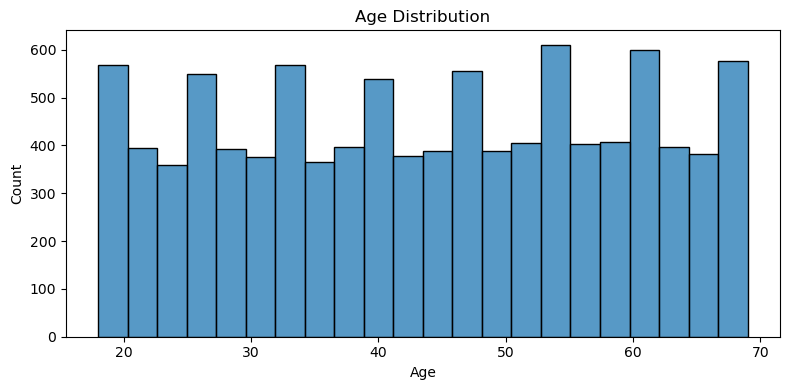

In [5]:
print("Q1: Age Summary")
print("Mean:", df['Age'].mean())
print("Median:", df['Age'].median())
print("Mode:", df['Age'].mode().iloc[0])
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df,x='Age')
plt.title("Age Distribution")
plt.tight_layout()

In [6]:
z_amount_purchased = zscore(df['Purchase Amount ($)'])
print("Q2")
print("Variance:", df['Purchase Amount ($)'].var())
print("Standard Deviation:", df['Purchase Amount ($)'].std())
print("zscore")
print(z_amount_purchased.head())

Q2
Variance: 81932.24073019275
Standard Deviation: 286.23808399685873
zscore
Customer ID
1   -1.052856
2    0.531219
3    1.606287
4   -0.063945
5   -1.259932
Name: Purchase Amount ($), dtype: float64


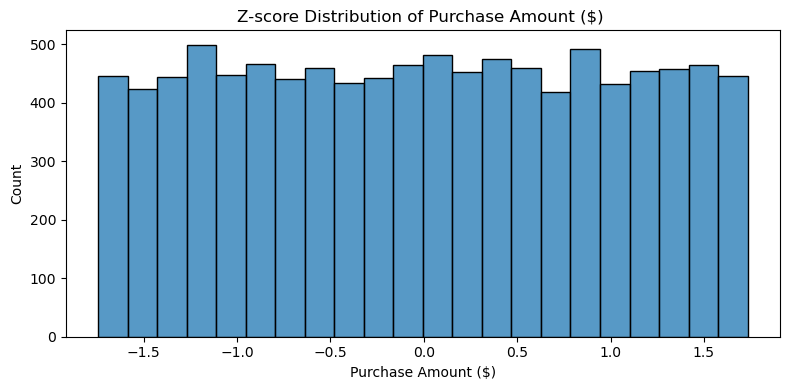

In [7]:
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(x=z_amount_purchased)
plt.title("Z-score Distribution of Purchase Amount ($) ")
plt.tight_layout()

Q3: Top Three Product Categories Based on the Number of Purchases


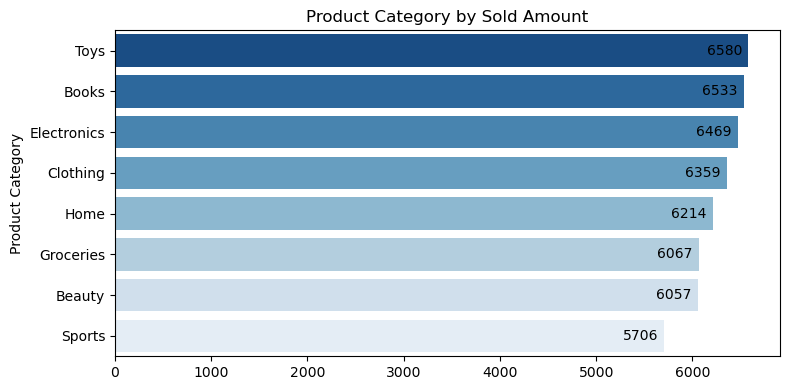

In [8]:
product_by_item_sold = (df.groupby('Product Category')['Number of Items Purchased'].sum()
                        .sort_values(ascending=False))

print("Q3: Top Three Product Categories Based on the Number of Purchases")
fig,ax = plt.subplots(figsize=(8,4))
sns.barplot(x=product_by_item_sold.values, 
            y=product_by_item_sold.index, 
            palette="Blues_r",ax=ax)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=-30)
plt.title("Product Category by Sold Amount")
plt.tight_layout()

Q4: Return Customers


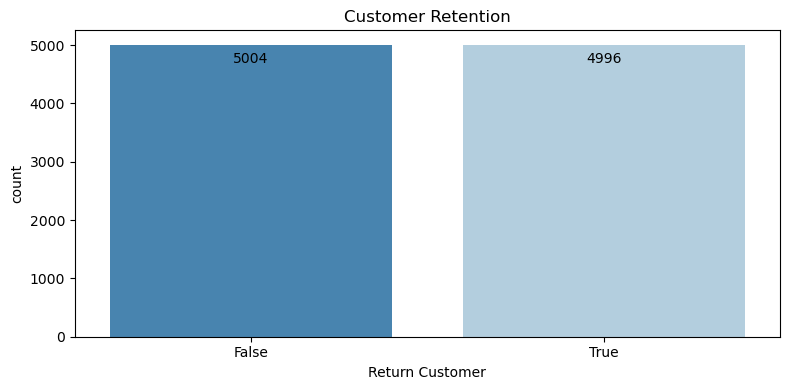

In [9]:
print("Q4: Return Customers")
fig,ax = plt.subplots(figsize=(8,4))
sns.countplot(data=df,x="Return Customer",palette="Blues_r")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=-15)
plt.title("Customer Retention")
plt.tight_layout()

In [10]:
df['Return Customer'].value_counts(normalize=True) * 100

False    50.04
True     49.96
Name: Return Customer, dtype: float64

In [11]:
print("Q5: Average Review Score Given by Customers")
print(df['Review Score (1-5)'].mean())

Q5: Average Review Score Given by Customers
2.9951


In [12]:
df['Review Score (1-5)'].describe()

count    10000.000000
mean         2.995100
std          1.404163
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Review Score (1-5), dtype: float64

In [13]:
delivary_time_by_subs = (df.groupby('Subscription Status')['Delivery Time (days)']
                         .mean()
                        .sort_values(ascending=False)
                        .loc[['Premium','Free']])

Q6: Average Delivery Time Vary between Subscription Statuses (Free,Premium)


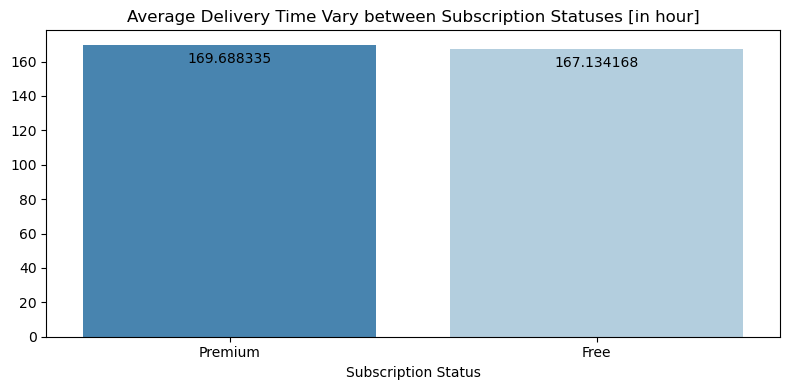

In [14]:
print("Q6: Average Delivery Time Vary between Subscription Statuses (Free,Premium)")
fig,ax = plt.subplots(figsize=(8,4))
sns.barplot(data=df,x=delivary_time_by_subs.index,y=delivary_time_by_subs.values*24,palette="Blues_r")
for container in ax.containers:
    ax.bar_label(container, fmt='%f', label_type='edge', padding=-15)
plt.title("Average Delivery Time Vary between Subscription Statuses [in hour]")
plt.tight_layout()

Q7: Customers are Subscribed to the Service
Premium    0.3369
Free       0.3354
Trial      0.3277
Name: Subscription Status, dtype: float64


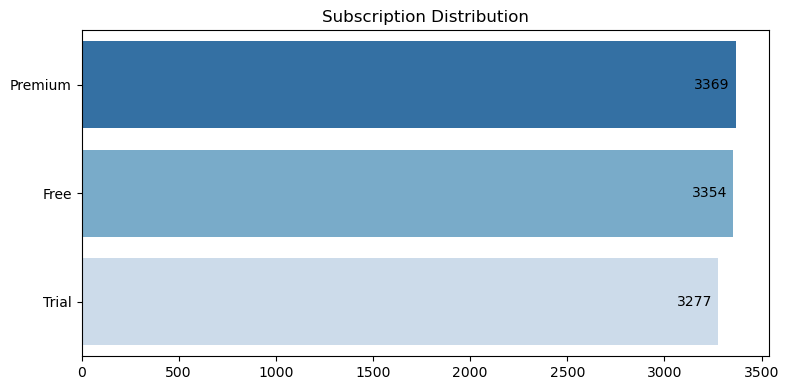

In [15]:
print("Q7: Customers are Subscribed to the Service")
service_customer =  df["Subscription Status"].value_counts()
print(df["Subscription Status"].value_counts(normalize=True))
fig,ax = plt.subplots(figsize=(8,4))
sns.barplot(x=service_customer.values, 
            y=service_customer.index, 
            palette="Blues_r",ax=ax)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=-30)
plt.title("Subscription Distribution")
plt.tight_layout()

Q8: Percentage of Customers Used Devices to Make Purchases


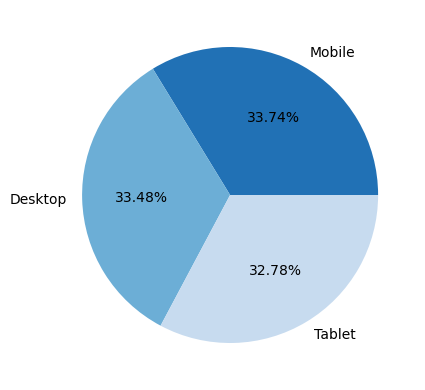

In [16]:
device_used = df['Device Type'].value_counts(normalize=True)*100
print("Q8: Percentage of Customers Used Devices to Make Purchases")
fig,ax = plt.subplots(figsize=(8,4))
colors = sns.color_palette("Blues_r", n_colors=len(device_used))
ax.pie(x = device_used.values, 
        labels=device_used.index,
        autopct='%.2f%%',
        colors=colors)
plt.tight_layout();

Q9: Avg Purchase Amount: Discount vs No Discount


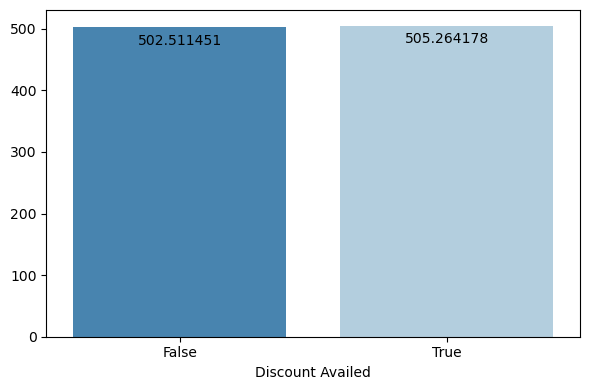

In [17]:
print("Q9: Avg Purchase Amount: Discount vs No Discount")
avg_item_by_discount = (df.groupby('Discount Availed')['Purchase Amount ($)'].mean()
                        .sort_values(ascending=False))

fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=avg_item_by_discount.index,y=avg_item_by_discount.values,palette="Blues_r")
for container in ax.containers:
    ax.bar_label(container, fmt='%f', label_type='edge', padding=-15)
plt.tight_layout()

Q10: Most Common Payment Method


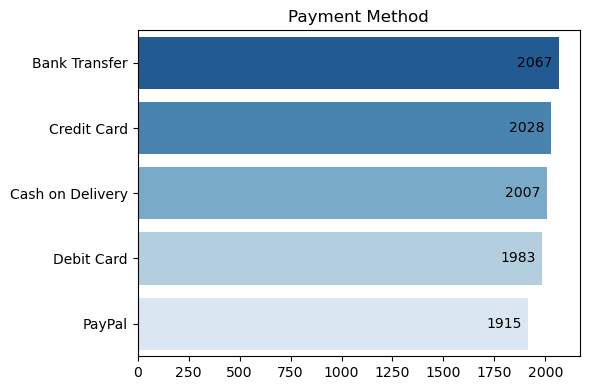

In [18]:
print("Q10: Most Common Payment Method")
payment_method = df['Payment Method'].value_counts()

fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(y=payment_method.index,x=payment_method.values,palette="Blues_r")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=-30)
plt.title("Payment Method")
plt.tight_layout()

## Level 2

Q1:Avg Review Score by Top Payment Method


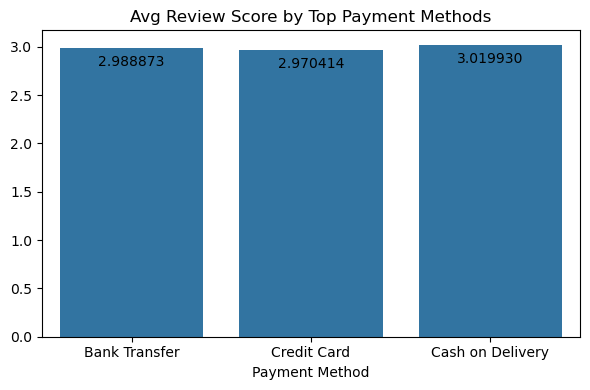

In [19]:
print("Q1:Avg Review Score by Top Payment Method")
avg_review_by_payment_method = (df.groupby('Payment Method')['Review Score (1-5)'].mean()
                        .sort_values(ascending=False)
                        .loc[['Bank Transfer','Credit Card','Cash on Delivery']])

fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=avg_review_by_payment_method.index,y=avg_review_by_payment_method.values,color='#1f77b4')
for container in ax.containers:
    ax.bar_label(container, fmt='%f', label_type='edge', padding=-15)
plt.title("Avg Review Score by Top Payment Methods")
plt.tight_layout()

Q2:  Correlation between Time Spent on the Website and Purchase Amount
0.010024809958752738


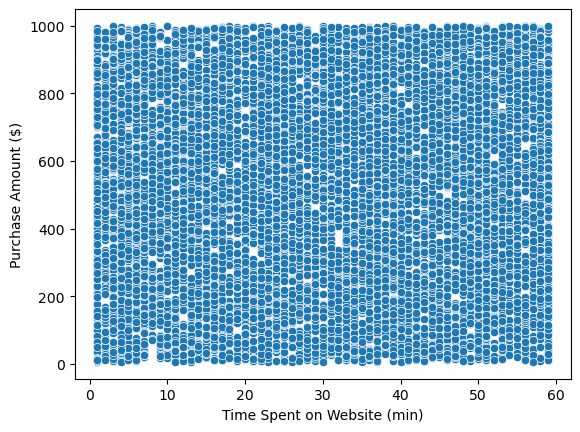

In [20]:
print("Q2:  Correlation between Time Spent on the Website and Purchase Amount")
print(df['Time Spent on Website (min)'].corr(df["Purchase Amount ($)"]))
sns.scatterplot(data = df, x = "Time Spent on Website (min)", y = "Purchase Amount ($)");

In [21]:
print("Q3: Percentage of Customers are Satisfied (rating of 4 or 5) and are Also Return Customers")
satisfied = df[df['Review Score (1-5)']>=4]
satisfed_rate = round((len(satisfied) / len(df))*100,2)
satisfied_return = satisfied[satisfied['Return Customer'] == True]
satisfied_return_rate = round((len(satisfied_return) / len(satisfied))*100,2)

print("Percentage of Customers are Satisfied:",satisfed_rate,"%" )
print("Percentage of Return Customers(Satisfied):",satisfied_return_rate,"%" )

Q3: Percentage of Customers are Satisfied (rating of 4 or 5) and are Also Return Customers
Percentage of Customers are Satisfied: 40.04 %
Percentage of Return Customers(Satisfied): 50.15 %


Q4: Relationship between the Number of Items Purchased and Customer Satisfaction


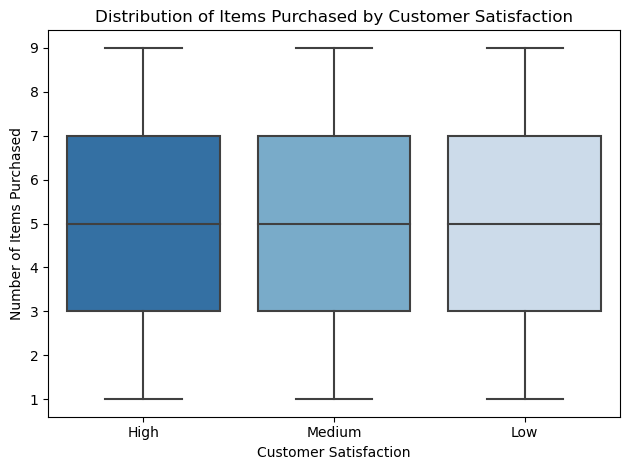

In [22]:
print("Q4: Relationship between the Number of Items Purchased and Customer Satisfaction")

sns.boxplot(data=df,
            x='Customer Satisfaction', 
            y='Number of Items Purchased',
            order=['High', 'Medium', 'Low'],
           palette="Blues_r")
plt.title("Distribution of Items Purchased by Customer Satisfaction")
plt.tight_layout();

In [23]:
print("Q4: Relationship between the Number of Items Purchased and Customer Satisfaction")
x = (df['Customer Satisfaction'].map({'Low': 1, 'Medium': 2, 'High': 3})).values.reshape(-1, 1) 
y = df[['Number of Items Purchased']]
model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary().tables[1])

Q4: Relationship between the Number of Items Purchased and Customer Satisfaction
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0389      0.068     74.163      0.000       4.906       5.172
x1            -0.0203      0.032     -0.642      0.521      -0.082       0.042


Q5: Location has the 2nd Highest Average Purchase Amount


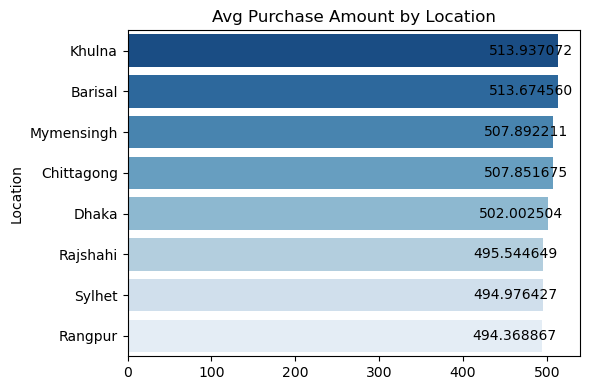

In [24]:
print("Q5: Location has the 2nd Highest Average Purchase Amount")
avg_purchase_by_location = (df.groupby('Location')['Purchase Amount ($)'].mean()
                        .sort_values(ascending=False))

fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(y=avg_purchase_by_location.index,
            x=avg_purchase_by_location.values,
            palette="Blues_r")
for container in ax.containers:
    ax.bar_label(container, fmt='%f', label_type='edge', padding=-50)
plt.title("Avg Purchase Amount by Location")
plt.tight_layout()

## Level 3

In [25]:
# Q1
X = df.drop(['Return Customer'], axis=1)
y = df[['Return Customer']]
cat_features = df.select_dtypes(include='object').columns.tolist()
model = CatBoostClassifier(
    iterations=100,       
    learning_rate=0.1,
    depth=6,
    verbose=0,
    cat_features=cat_features,
    random_state=42
)
model.fit(X, y)

Q1: Factors Contribute Most to a Customer being Classified as a Return Customer


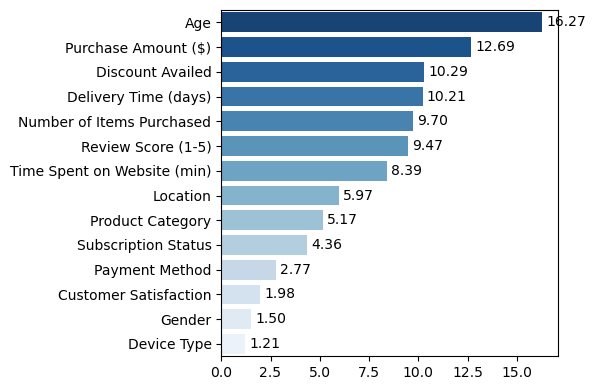

In [29]:
importance_series = pd.Series(model.get_feature_importance(),
                              index=X.columns).sort_values(ascending=False)
print("Q1: Factors Contribute Most to a Customer being Classified as a Return Customer")
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(y=importance_series.index,
            x=importance_series.values,
            palette="Blues_r")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
#plt.title("Factors Contribute Most to a Customer being Classified as a Return Customer [CatBoostClassifier]")
plt.tight_layout()

Q2: Payment Methods influence on Customer Satisfaction and Return Rates

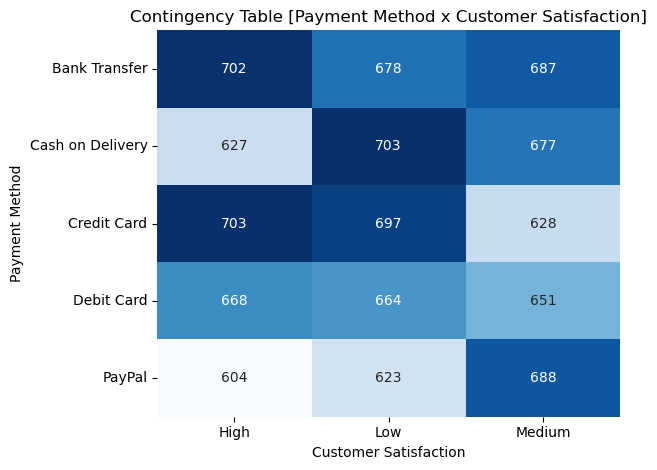

In [30]:
contingency_table1 = pd.crosstab(df['Payment Method'], df['Customer Satisfaction'])
sns.heatmap(contingency_table1,annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title("Contingency Table [Payment Method x Customer Satisfaction]")
plt.tight_layout();

In [31]:
chi2, p, dof, expected = chi2_contingency(contingency_table1)
n = contingency_table1.sum().sum()
phi2 = chi2 / n
r, k = contingency_table1.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print("Chi-Square Test Summary: Payment Method x Customer Satisfaction")
print(f"Chi-square statistic = {chi2:.4f}")
print(f"Degrees of freedom   = {dof}")
print(f"p-value              = {p:.4f}")
print(f"Cramér’s V: {cramers_v:.4f}")

Chi-Square Test Summary: Payment Method x Customer Satisfaction
Chi-square statistic = 15.8143
Degrees of freedom   = 8
p-value              = 0.0451
Cramér’s V: 0.0281


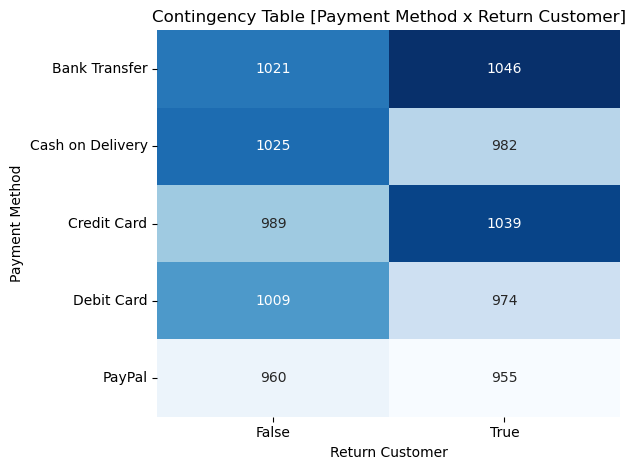

In [32]:
contingency_table2 = pd.crosstab(df['Payment Method'], df['Return Customer'])
sns.heatmap(contingency_table2,annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title("Contingency Table [Payment Method x Return Customer]")
plt.tight_layout();

In [33]:
chi2, p, dof, expected = chi2_contingency(contingency_table2)
n = contingency_table2.sum().sum()
phi2 = chi2 / n
r, k = contingency_table2.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print("Chi-Square Test Summary: Payment Method x Return Customer")
print(f"Chi-square statistic = {chi2:.4f}")
print(f"Degrees of freedom   = {dof}")
print(f"p-value              = {p:.4f}")
print(f"Cramér’s V: {cramers_v:.4f}")

Chi-Square Test Summary: Payment Method x Return Customer
Chi-square statistic = 3.0808
Degrees of freedom   = 4
p-value              = 0.5444
Cramér’s V: 0.0176


In [17]:
X = pd.get_dummies(df['Payment Method'], drop_first=True)
y = df['Return Customer']
model = sm.Logit(y,sm.add_constant(X)).fit()
print(model.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.692993
         Iterations 3
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0242      0.044      0.550      0.582      -0.062       0.110
Cash on Delivery    -0.0670      0.063     -1.070      0.285      -0.190       0.056
Credit Card          0.0251      0.063      0.402      0.688      -0.097       0.148
Debit Card          -0.0595      0.063     -0.946      0.344      -0.183       0.064
PayPal              -0.0294      0.063     -0.464      0.643      -0.154       0.095


## Q3

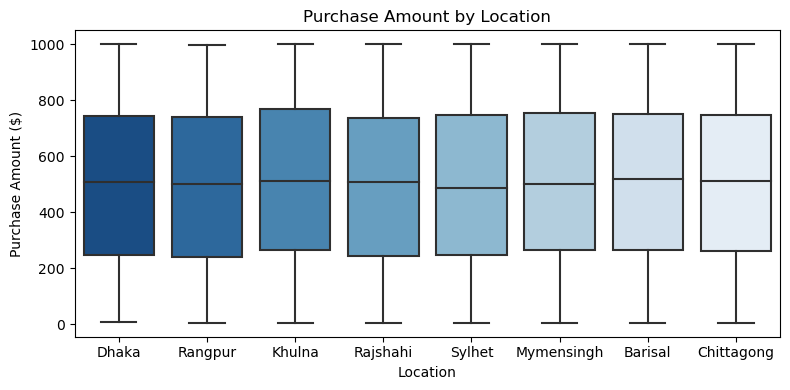

In [22]:
fig,ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=df,x='Location', y='Purchase Amount ($)', palette="Blues_r")
plt.title("Purchase Amount by Location")
plt.tight_layout();

In [27]:
anova_results = pg.anova(data=df, dv='Purchase Amount ($)', between='Location', detailed=True)
print(anova_results)

     Source            SS    DF            MS         F     p-unc       np2
0  Location  5.909620e+05     7  84423.145389  1.030424  0.407128  0.000721
1    Within  8.186495e+08  9992  81930.495701       NaN       NaN       NaN


In [32]:
df["Delivery Time (hours)"] = df['Delivery Time (days)']*24

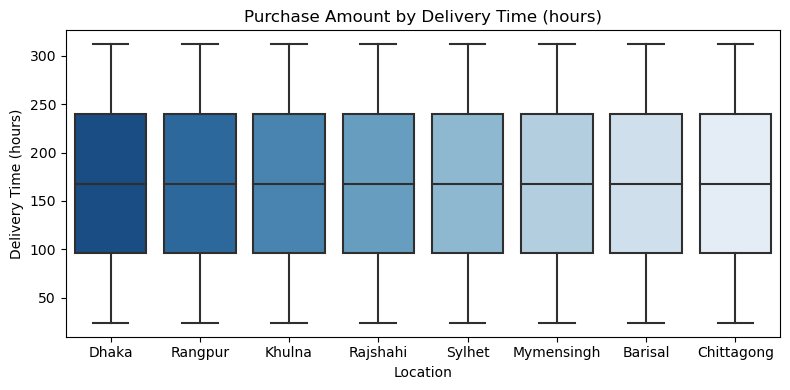

In [33]:
fig,ax = plt.subplots(figsize=(8,4))
sns.boxplot(data = df, x= 'Location', y='Delivery Time (hours)', palette="Blues_r")
plt.title("Purchase Amount by Delivery Time (hours)")
plt.tight_layout();

In [34]:
anova_results = pg.anova(data=df, dv='Delivery Time (hours)', between='Location', detailed=True)
print(anova_results)

     Source            SS    DF           MS        F    p-unc       np2
0  Location  4.896536e+04     7  6995.051271  0.87676  0.52385  0.000614
1    Within  7.971915e+07  9992  7978.297558      NaN      NaN       NaN


## By Md. Iktiyar Hossain